In [10]:
from base import tools

import pandas as pd

from nilearn import plotting as niplt
import matplotlib.pyplot as mlplt

import seaborn as sns
import matplotlib as ml
import numpy as np
import random
import matplotlib.colors as mplcolors

from base.plotting import nine_colors
import nibabel as nib
import joblib

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [11]:
from neurosynth.base.dataset import Dataset
dataset = Dataset.load('../data/0.6/datasets/db_v6_topics-100.pkl')

In [12]:
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale, normalize

In [4]:
saved_pca = '../results/clustering/dv_v6_reference_pca.pkl'
reference = joblib.load(saved_pca)

## Cluster

In [13]:
from fastcluster import ward
from scipy.cluster.hierarchy import fcluster, dendrogram, cophenet
from neurosynth.analysis.cluster import Clusterable

In [8]:
roi = Clusterable(dataset, '../masks/HO_ROIs/new_medial_fc_30.nii.gz', min_studies=100)
masker = roi.masker
distances = pairwise_distances(roi.data, reference.data, metric='correlation')

Z = ward(distances)

KeyboardInterrupt: 

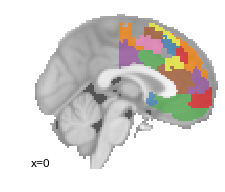

In [11]:
n_cluster = 18
img = nib.Nifti1Image(masker.unmask(fcluster(Z, n_cluster, 'maxclust')), masker.get_header().get_best_affine())
niplt.plot_roi(img, cmap=mplcolors.ListedColormap(sns.color_palette('Set1', n_cluster)), display_mode='x', cut_coords=[0])

In [12]:
n_cluster = 18
img = nib.Nifti1Image(masker.unmask(fcluster(Z, n_cluster, 'maxclust')), masker.get_header().get_best_affine())
base_rates_or = tools.region_vox_baserates(dataset, img)
base_rates_or = base_rates_or.groupby('region').mean().reset_index()
base_rates_or = pd.merge(base_rates_or, tools.region_n_vox(dataset, img))

WARNING dataset Warning: get_image_data() is being called without specifying a subset of studies or voxels to retrieve. This may result in a very large amount of data (several GB) being read into memory. If you experience any problems, consider returning a sparse matrix by passing dense=False, or pass in a list of ids of voxels to retrieve only a portion of the data.


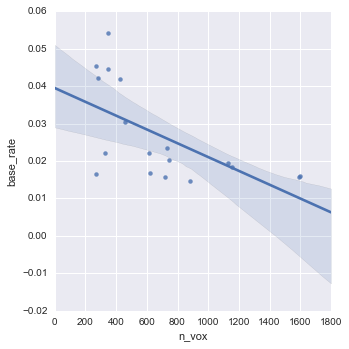

In [13]:
sns.lmplot('n_vox', 'base_rate', base_rates_or)

In [14]:
base_rates_or.corr()

,region,base_rate,n_vox
region,1.000000,0.270881,-0.428346
base_rate,0.270881,1.000000,-0.611740
n_vox,-0.428346,-0.611740,1.000000


In [15]:
## Cluster w/ scaled
scaled_distance = scale(distances, axis=1)
Z_scale = ward(scaled_distance)

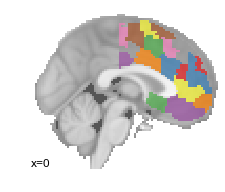

In [16]:
n_cluster = 18
img = nib.Nifti1Image(masker.unmask(fcluster(Z_scale, n_cluster, 'maxclust')), masker.get_header().get_best_affine())
niplt.plot_roi(img, cmap=mplcolors.ListedColormap(sns.color_palette('Set1', n_cluster)), display_mode='x', cut_coords=[0])

In [17]:
base_rates = tools.region_vox_baserates(dataset, img)
base_rates = base_rates.groupby('region').mean().reset_index()
base_rates = pd.merge(base_rates, tools.region_n_vox(dataset, img))

WARNING dataset Warning: get_image_data() is being called without specifying a subset of studies or voxels to retrieve. This may result in a very large amount of data (several GB) being read into memory. If you experience any problems, consider returning a sparse matrix by passing dense=False, or pass in a list of ids of voxels to retrieve only a portion of the data.


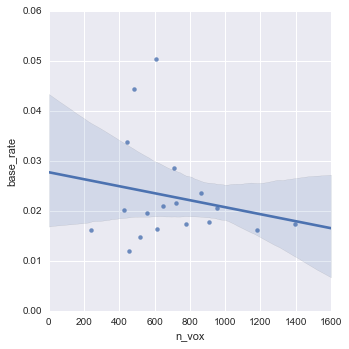

In [18]:
sns.lmplot('n_vox', 'base_rate', base_rates)

In [19]:
base_rates.corr()

,region,base_rate,n_vox
region,1.000000,0.462959,-0.418760
base_rate,0.462959,1.000000,-0.194275
n_vox,-0.418760,-0.194275,1.000000


In [20]:
## Cluster w/ scaled
norm_distance = normalize(distances, 'l1')
Z_norm = ward(norm_distance)

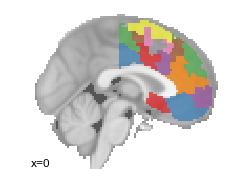

In [21]:
n_cluster = 18
img = nib.Nifti1Image(masker.unmask(fcluster(Z_norm, n_cluster, 'maxclust')), masker.get_header().get_best_affine())
niplt.plot_roi(img, cmap=mplcolors.ListedColormap(sns.color_palette('Set1', n_cluster)), display_mode='x', cut_coords=[0])

In [22]:
base_rates_norm = tools.region_vox_baserates(dataset, img)
base_rates_norm = base_rates_norm.groupby('region').mean().reset_index()
base_rates_norm = pd.merge(base_rates_norm, tools.region_n_vox(dataset, img))

WARNING dataset Warning: get_image_data() is being called without specifying a subset of studies or voxels to retrieve. This may result in a very large amount of data (several GB) being read into memory. If you experience any problems, consider returning a sparse matrix by passing dense=False, or pass in a list of ids of voxels to retrieve only a portion of the data.


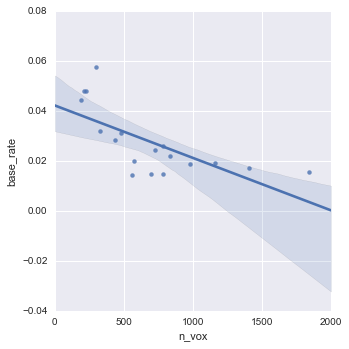

In [23]:
sns.lmplot('n_vox', 'base_rate', base_rates_norm)

In [ ]:
base_rates_norm.corr()

,region,base_rate,n_vox
region,1.000000,0.546793,-0.526506
base_rate,0.546793,1.000000,-0.689547
n_vox,-0.526506,-0.689547,1.000000


## Whole brain

In [6]:
import joblib

In [7]:
Z_norm = joblib.load('../results/clustering/hierarchical/v6_ward_c30_scaled.pkl')

In [8]:
Z = joblib.load('../results/clustering/hierarchical/v6_ward_c30.pkl')

In [14]:
roi = Clusterable(dataset, '../masks/HO_ROIs/cortex_30.nii.gz', min_studies=100)
masker = roi.masker

In [43]:
n_cluster = 33
img = nib.Nifti1Image(masker.unmask(fcluster(Z, n_cluster, 'maxclust')), masker.get_header().get_best_affine())
base_rates_or = tools.region_vox_baserates(dataset, img)
base_rates_or = base_rates_or.groupby('region').mean().reset_index()
base_rates_or = pd.merge(base_rates_or, tools.region_n_vox(dataset, img))
base_rates_or.corr()

WARNING dataset Warning: get_image_data() is being called without specifying a subset of studies or voxels to retrieve. This may result in a very large amount of data (several GB) being read into memory. If you experience any problems, consider returning a sparse matrix by passing dense=False, or pass in a list of ids of voxels to retrieve only a portion of the data.


,region,base_rate,n_vox
region,1.000000,-0.269384,0.328704
base_rate,-0.269384,1.000000,-0.466445
n_vox,0.328704,-0.466445,1.000000


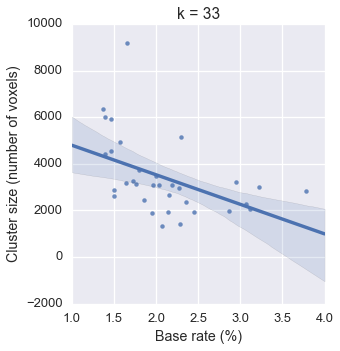

In [44]:
base_rates_or['base_rate'] = base_rates_or.base_rate * 100
sns.set_context('talk')
p = sns.lmplot('base_rate', 'n_vox', data=base_rates_or)
p.ax.set_title('k = 33')
p.ax.set_xlabel('Base rate (%)')
p.ax.set_ylabel('Cluster size (number of voxels)')

In [15]:
n_cluster = 70
img = nib.Nifti1Image(masker.unmask(fcluster(Z, n_cluster, 'maxclust')), masker.get_header().get_best_affine())
base_rates_or = tools.region_vox_baserates(dataset, img)
base_rates_or = base_rates_or.groupby('region').mean().reset_index()
base_rates_or = pd.merge(base_rates_or, tools.region_n_vox(dataset, img))
base_rates_or.corr()

WARNING dataset Warning: get_image_data() is being called without specifying a subset of studies or voxels to retrieve. This may result in a very large amount of data (several GB) being read into memory. If you experience any problems, consider returning a sparse matrix by passing dense=False, or pass in a list of ids of voxels to retrieve only a portion of the data.


,region,base_rate,n_vox
region,1.000000,-0.178027,0.283486
base_rate,-0.178027,1.000000,-0.651770
n_vox,0.283486,-0.651770,1.000000


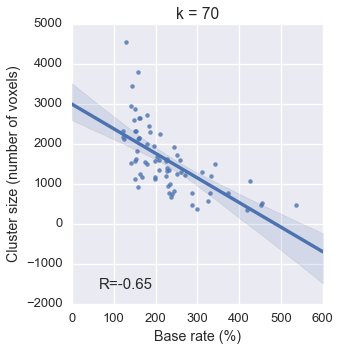

In [35]:
base_rates_or['base_rate'] = base_rates_or.base_rate * 100
sns.set_context('talk')
p = sns.lmplot('base_rate', 'n_vox', data=base_rates_or)
p.ax.set_title('k = 70')
p.ax.set_xlabel('Base rate (%)')
p.ax.set_ylabel('Cluster size (number of voxels)')
p.fig.text(0.3, .2,'R=-0.65', fontsize=15)

In [20]:
n_cluster = 33
img_norm = nib.Nifti1Image(masker.unmask(fcluster(Z_norm, n_cluster, 'maxclust')), masker.get_header().get_best_affine())
base_rates_norm = tools.region_vox_baserates(dataset, img_norm)
base_rates_norm = base_rates_norm.groupby('region').mean().reset_index()
base_rates_norm = pd.merge(base_rates_norm, tools.region_n_vox(dataset, img_norm))
base_rates_norm.corr()

WARNING dataset Warning: get_image_data() is being called without specifying a subset of studies or voxels to retrieve. This may result in a very large amount of data (several GB) being read into memory. If you experience any problems, consider returning a sparse matrix by passing dense=False, or pass in a list of ids of voxels to retrieve only a portion of the data.


,region,base_rate,n_vox
region,1.000000,0.086152,-0.216111
base_rate,0.086152,1.000000,0.329039
n_vox,-0.216111,0.329039,1.000000


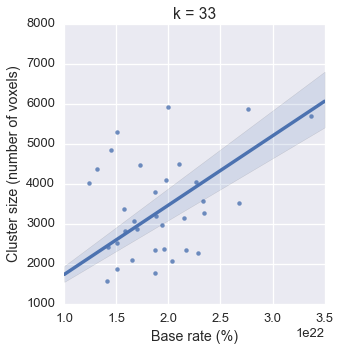

In [40]:
base_rates_norm['base_rate'] = base_rates_norm.base_rate * 100
sns.set_context('talk')
p = sns.lmplot('base_rate', 'n_vox', data=base_rates_norm)
p.ax.set_title('k = 33')
p.ax.set_xlabel('Base rate (%)')
p.ax.set_ylabel('Cluster size (number of voxels)')

In [28]:
n_cluster = 70
img_norm = nib.Nifti1Image(masker.unmask(fcluster(Z_norm, n_cluster, 'maxclust')), masker.get_header().get_best_affine())
base_rates_norm = tools.region_vox_baserates(dataset, img_norm)
base_rates_norm = base_rates_norm.groupby('region').mean().reset_index()
base_rates_norm = pd.merge(base_rates_norm, tools.region_n_vox(dataset, img_norm))
base_rates_norm.corr()

WARNING dataset Warning: get_image_data() is being called without specifying a subset of studies or voxels to retrieve. This may result in a very large amount of data (several GB) being read into memory. If you experience any problems, consider returning a sparse matrix by passing dense=False, or pass in a list of ids of voxels to retrieve only a portion of the data.


,region,base_rate,n_vox
region,1.000000,0.150429,-0.001210
base_rate,0.150429,1.000000,0.049328
n_vox,-0.001210,0.049328,1.000000


In [29]:
base_rates_norm['base_rate'] = base_rates_norm.base_rate * 100


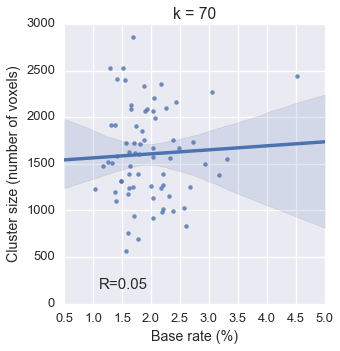

In [34]:
sns.set_context('talk')
p = sns.lmplot('base_rate', 'n_vox', data=base_rates_norm)
p.ax.set_title('k = 70')
p.ax.set_xlabel('Base rate (%)')
p.ax.set_ylabel('Cluster size (number of voxels)')
p.fig.text(0.3, .2,'R=0.05', fontsize=15)

In [37]:
base_rates_norm.n_vox.describe()

count      70.000000
mean     1605.114286
std       502.628296
min       560.000000
25%      1243.250000
50%      1570.000000
75%      1976.500000
max      2862.000000
Name: n_vox, dtype: float64

In [38]:
base_rates_or.n_vox.describe()

count      70.000000
mean     1605.114286
std       830.126768
min       352.000000
25%      1079.500000
50%      1509.500000
75%      2134.750000
max      4546.000000
Name: n_vox, dtype: float64